In [1]:
from Functions import*


In [2]:
test_list_covid, train_list_covid,val_list_covid=create_list_to_load(covid=True)

test_list_Noncovid, train_list_Noncovid,val_list_Noncovid=create_list_to_load(covid=False)

In [3]:
test_covid_labels=create_list_labels(test_list_covid,covid=True)
train_covid_labels=create_list_labels(train_list_covid,covid=True)
val_covid_labels=create_list_labels(val_list_covid,covid=True)

test_Noncovid_labels=create_list_labels(test_list_Noncovid,covid=False)
train_Noncovid_labels=create_list_labels(train_list_Noncovid,covid=False)
val_Noncovid_labels=create_list_labels(val_list_Noncovid,covid=False)

In [4]:
test_list,test_labels=concatenate_lists_and_labels(test_list_covid,test_covid_labels,test_list_Noncovid,test_Noncovid_labels)
train_list,train_labels=concatenate_lists_and_labels(train_list_covid,train_covid_labels,train_list_Noncovid,train_Noncovid_labels)
val_list,val_labels=concatenate_lists_and_labels(val_list_covid,val_covid_labels,val_list_Noncovid,val_Noncovid_labels)

In [5]:
test_list,test_labels=shuffle_lists(test_list, test_labels)
train_list,train_labels=shuffle_lists(train_list, train_labels)
val_list,val_labels=shuffle_lists(val_list, val_labels)



In [6]:
#the article precises the size of the images as (480,480)

img_w,img_h,img_ch=480,480,1

test_set=load_data(test_list,img_w,img_h,img_ch)
train_set=load_data(train_list,img_w,img_h,img_ch)
val_set=load_data(val_list,img_w,img_h,img_ch)

test_labels=np.array(test_labels)
train_labels=np.array(train_labels)
val_labels=np.array(val_labels)


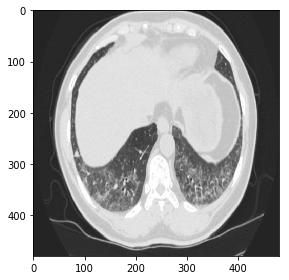

In [7]:
imshow(np.squeeze(val_set[0]))

In [8]:
K.clear_session()
my_model=vg_model(1, 480, 480,32,dropout=True,dr=0.2,Batch_normalization=True)
my_model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 480, 480, 32)      320       
_________________________________________________________________
batch_normalization_v2 (Batc (None, 480, 480, 32)      128       
_________________________________________________________________
activation (Activation)      (None, 480, 480, 32)      0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 480, 480, 64)      18496     
_________________________________________________________________
batch_normalization_v2_1 (Ba (None, 480, 480, 64)      256       
_________________________________________________________________
activation_1 (Activation)    (None, 480, 480, 64)      0         
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 240, 240, 64)      0

In [9]:
learning_rate=0.00001
optimizer=Adam(learning_rate)
batch_size=16
loss_function = 'binary_crossentropy'
metrics=['binary_accuracy',precision,recall]
n_epochs=100

In [10]:
#data augmentation
dictionary_augmentation = dict(
                     rotation_range=10,
                     width_shift_range=0.1,
                     height_shift_range=0.1,
                     zoom_range=0.2,       
                     horizontal_flip=True,
                     brightness_range=[0,2])


In [11]:
 STEP_SIZE_TRAIN=len(train_set)//batch_size

In [12]:
train_generator=augmentation(train_set,train_labels,dictionary_augmentation,batch_size=batch_size)

In [13]:
my_model.compile(loss=loss_function,optimizer = optimizer,metrics=['binary_accuracy'])

In [14]:
model_hist=my_model.fit_generator(generator=train_generator,
                        steps_per_epoch=STEP_SIZE_TRAIN,
                        validation_data=(train_set,train_labels)
                        ,epochs=n_epochs,verbose=1)

Epoch 1/100
26/26 [==============================] - 23s 883ms/step - loss: 0.8141 - binary_accuracy: 0.4377 - val_loss: 0.6936 - val_binary_accuracy: 0.4494
Epoch 2/100
26/26 [==============================] - 13s 509ms/step - loss: 0.7436 - binary_accuracy: 0.5037 - val_loss: 0.6924 - val_binary_accuracy: 0.5506
Epoch 3/100
26/26 [==============================] - 13s 509ms/step - loss: 0.7047 - binary_accuracy: 0.5501 - val_loss: 0.6921 - val_binary_accuracy: 0.5506
Epoch 4/100
26/26 [==============================] - 13s 511ms/step - loss: 0.7038 - binary_accuracy: 0.5477 - val_loss: 0.6937 - val_binary_accuracy: 0.4494
Epoch 5/100
26/26 [==============================] - 13s 511ms/step - loss: 0.7048 - binary_accuracy: 0.5379 - val_loss: 0.6951 - val_binary_accuracy: 0.4494
Epoch 6/100
26/26 [==============================] - 13s 512ms/step - loss: 0.7162 - binary_accuracy: 0.5012 - val_loss: 0.6925 - val_binary_accuracy: 0.5506
Epoch 7/100
26/26 [==============================] -

KeyboardInterrupt: 

In [ ]:
loss_curves_plot(model_hist)

In [ ]:
accuracy_curves_plot(model_hist,'binary_accuracy')